In [ ]:
from google.colab import drive
%load_ext autoreload
%autoreload 2

drive.mount('/content/gdrive') #inbedpose

!cp "/content/gdrive/My Drive/CODES_inbedpose_estimation/transfer_modules.py" '/content'
!cp "/content/gdrive/My Drive/CODES_inbedpose_estimation/inbed_pose_estimation/requirements.txt" '/content/'

!cp -r '/content/gdrive/MyDrive/In-Bed-Human-Pose-Estimation(VIP-CUP)' '/content'

!bash requirements.txt

In [47]:
from transfer_modules import send_modules, recieve_modules
recieve_modules()
#send_modules()

modules send to : /content/gdrive/My Drive/CODES_inbedpose_estimation/inbed_pose_estimation/modules


In [19]:
!rm -rf /content/checkpoints_prev
!cp -r '/content/gdrive/My Drive/In-Bed-Human-Pose-Estimation(VIP-CUP)/Detectron2_supplementary_udith/saved_outputs_v3_fixed_bbox/' '/content/checkpoints_prev'
TL_model_dir = '/content/checkpoints_prev/rgb_uncover/model_final.pth'

In [ ]:
!python /content/inbed_pose_estimation/modules/examples/training.py --task 'RGB' --max_iter 300 --dataset_idx 1001
#!python /content/inbed_pose_estimation/modules/examples/training.py --task 'IR' --TL_model_dir $TL_model_dir --dataset_idx 1001
#!python /content/inbed_pose_estimation/modules/examples/training.py  --task 'IR' --TL_model_dir $TL_model_dir --img_folder_name "cover1_cyclegan" --dataset_idx 1001

## Test NEW RGB MODEL with Existing

In [45]:
full_model_dir1 = './output/paired_RGB_uncoverv1001_train/model_final.pth'
full_model_dir2 = '/content/checkpoints_prev/rgb_uncover/model_final.pth'

label_model1 ='rgb'
label_model2 = 'rgb (previous)'

100
200
Acc(rgb) : 0.8457671957671957
Acc(rgb (previous)) : 0.8224867724867725


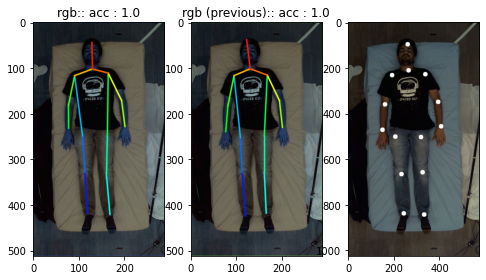

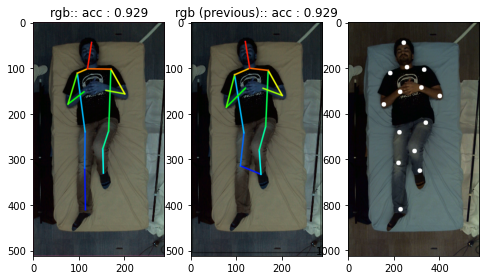

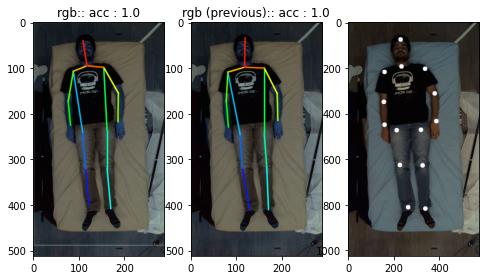

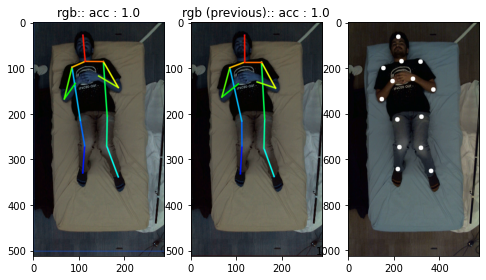

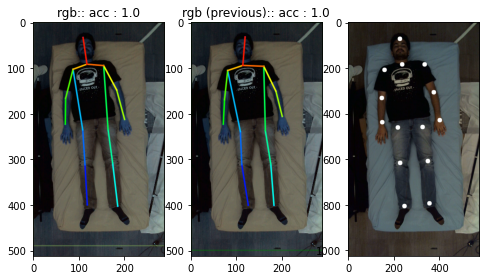

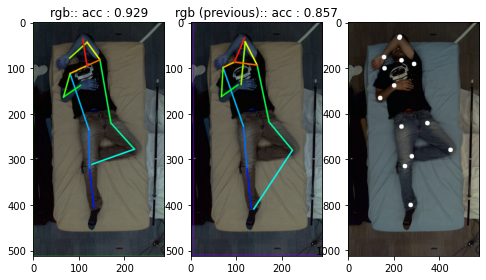

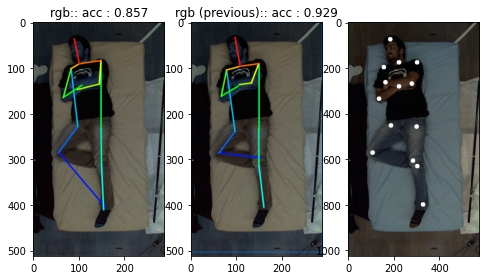

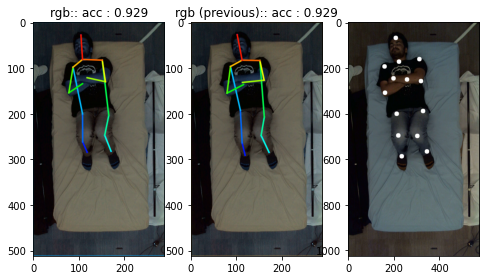

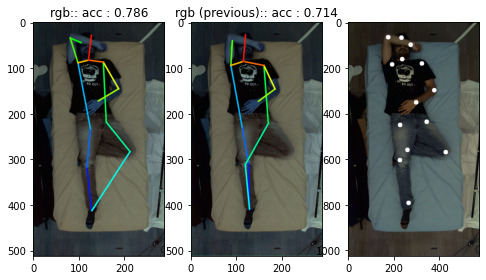

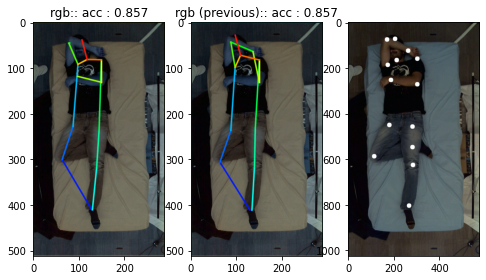

In [46]:
import sys
sys.path.append('/content/inbed_pose_estimation')

import glob
import numpy as np
from modules.utils.sorting_functions import sort_by_subject
from modules.evaluation.quant_analysis import quantitative_analysis

train_uncover=  []
for data_dir in glob.glob('In-Bed-Human-Pose-Estimation(VIP-CUP)/train/*'):
    if int(data_dir[-5:])<=30:train_uncover.append(data_dir)
train_uncover_dirs= sorted(train_uncover, key=sort_by_subject)

data_dirs = train_uncover_dirs[24:]
type_= 'RGB' 
img_folder_name = 'uncover'
# full img directories will be: eg: f'{data_dirs[i]}/{type_}/{img_folder_name}/image_000001.jpg'

quantitative_analysis(data_dirs, type_, img_folder_name, n_samples= None, bbox_style= 'fixed_to_img_size', 
                      full_model_dir1=full_model_dir1, full_model_dir2=full_model_dir2, 
                      label_model1=label_model1, label_model2=label_model2, 
                      vis_type= 'new',
                      show_n_results= 10)

# Summarized from:

1. detectron_train.ipynb
2. detectron_TransferLearning.ipynb
